## 2) Convolution
### Convolution provides a way of multiplying two arrays to produce a third array. Depending on the designed filter and the intended effect, the kernel can be a matrix of dimensions, for example, 3x3, 5x5 or 7x7.

In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import math

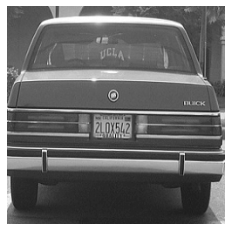

In [2]:
#reading in an image
#reading in and showing an image as greyscale (so we can see impact of kernel more easily)
img = cv2.imread("car-1.jpg")
plt.axis('off')
img = img[:,:,::-1]
img = cv2.resize(img, (250,250))
img = np.dot(img[...,:3], [0.3, 0.59, 0.11]) 
plt.imshow(img, cmap='gray')

In [3]:
#creating a function that takes in an image and preps it for easy manipulation
def ICV_prepImage(img):
  #reversing colour channels so the photo is displayed properly
  rgbImage = img[:,:,::-1]
  #resizing to make it easier to work with
  resizeImage = cv2.resize(rgbImage, (250,250))
  #prepping the image to show in greyscale
  greyImage = np.dot(resizeImage[...,:3], [0.3, 0.59, 0.11])
  return greyImage

Original Image:


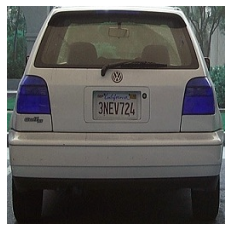

In [4]:
originalCar2 = cv2.imread("car-2.jpg")
plt.axis('off')
print("Original Image:")
plt.imshow(originalCar2)

Clean Image:


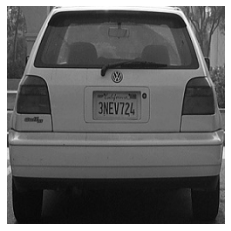

In [5]:
cleanCar2 = ICV_prepImage(originalCar2)
plt.axis('off')
print("Clean Image:")
plt.imshow(cleanCar2, cmap='gray')

##### A) Code a function that takes an input image, performs convolution with a given kernel, and returns the resulting image.

In [6]:
#the easy part - creating a 3x3 kernel 
kernel = np.array([1,0,1,0,1,0,1,0,1]).reshape(3,3)
print(kernel)

[[1 0 1]
 [0 1 0]
 [1 0 1]]


In [7]:
#similar to Q1, i want to calculate the size of the image after it has been manipulated
#because i'm not rotating or skewing the image, it won't change much - 
#but when applying convolution with a kernel, we're essentially averging the pixel values within a kernel at the centre
#this will eventually result in an image size that is slightly smaller than the image
#the resulting size is dependant on the kernel given, so we want to calculate this new size
#and fill it with zeros so that we have a canvas to populate when it comes to actually convolving the image

#identifying the shape of the image
imgSize = img.shape[0]

#identifying the shape of the kernel
kernelSize = kernel.shape[0]

#variable to increment as we run through the calculation and calculate the new image pixel size
newImagePixels = 0

#forloop to go from 0 to imgSize - 1, add the kernelSize to each pixel and and increment my variable as long as it's smaller than imgSize 
for i in range(imgSize):
  x = i + kernelSize
  if x <= imgSize:
    newImagePixels += 1

#setting the size of the new image after convolution with a 2D array of zeros
newSize = np.zeros((newImagePixels, newImagePixels))

#now we should see the size of the convoluted image will be slightly smaller than the original image size
print("size of the original image:",img.shape)
print("size of the image once it has been convolved: ", newSize.shape)

size of the original image: (250, 250)
size of the image once it has been convolved:  (248, 248)


In [8]:
#for loop to go through each pixel in the image matrix, apply the convolution by multiplying each pixel by the kernel, sum the result and return the new image marix
for i in range(newImagePixels):
  for j in range(newImagePixels):
    currentMatrix = img[i: i+kernelSize, j:j+kernelSize]
    newSize[i,j] = np.sum(np.multiply(currentMatrix, kernel))

newSize

array([[ 436.1 ,  435.38,  440.69, ...,  454.56,  471.98,  446.22],
       [ 433.37,  433.95,  433.53, ...,  445.43,  492.56,  445.18],
       [ 420.17,  427.03,  435.02, ...,  496.52,  468.24,  464.05],
       ...,
       [ 550.78,  583.78,  542.45, ...,  991.43,  966.75,  979.02],
       [ 555.84,  540.4 ,  557.67, ..., 1054.18, 1066.67, 1038.77],
       [ 553.13,  574.84,  560.89, ..., 1082.33, 1121.81, 1106.19]])

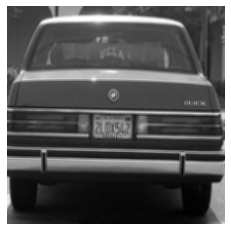

In [9]:
#testing calculation
plt.axis('off')
plt.imshow(newSize, cmap='gray')

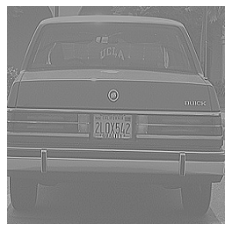

In [10]:
#testing with a different kernel
anotherKernel = np.array([0,-1,0,-1,5,-1,0,-1,0]).reshape(3,3)

imgSize = img.shape[0]
anotherKernelSize = anotherKernel.shape[0]
newImagePixels = 0

for i in range(imgSize):
  x = i + anotherKernelSize
  if x <= imgSize:
    newImagePixels += 1

newSize = np.zeros((newImagePixels, newImagePixels))

for i in range(newImagePixels):
  for j in range(newImagePixels):
    currentArea = img[i: i+anotherKernelSize, j:j+anotherKernelSize]
    newSize[i,j] = np.sum(np.multiply(currentArea, anotherKernel))

plt.axis('off')
plt.imshow(newSize, cmap='gray')

In [11]:
#making calculations into a function that takes in an image & a kernel
def ICV_Convolve(image, kernel):
  #get the height of the image that was passed in
  imageSize = image.shape[0]
  #get the height of the kernel that was passed in
  kernelSize = kernel.shape[0]
  #variable to count the pixel size of an image
  newImagePixels = 0

  #forloop to calculate the image size after convolution
  for i in range(imageSize):
    #getting the size of a pixel when the kernel is being applied to it:
    pixelSize = i + kernelSize
    #if the size of the kernel & pixel is the same size as or bigger than the size of the original image
    #increment newImagePixel
    if pixelSize <= imageSize:
      newImagePixels += 1
  
  #creating the canvas size for the convoluted image out of newImagePixels and filling it with 0s
  newImage = np.zeros((newImagePixels, newImagePixels))

  #forloop to go over each pixel in the image, pull out the matrix that i want to apply the kernel to and apply the kernel calculation
  for j in range(newImagePixels):
    for k in range(newImagePixels):
      #identifying the matrix area and adding the kernel size to get the 3x3 region
      currentMatrix = image[j: j+kernelSize, k:k+kernelSize]
      #applying the kernel by multiplying the current matrix by the kernel and getting the sum of the result and then storing the result in the new/empty canvas
      newImage[j,k] = np.sum(np.multiply(currentMatrix, kernel))

  return newImage

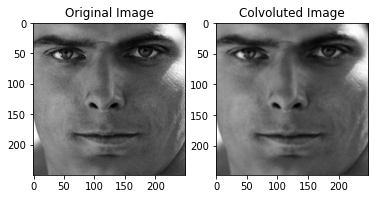

In [12]:
#testing the function
img = cv2.imread("face-1.jpg")
cleanImg = ICV_prepImage(img)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Original Image')
ax1.imshow(cleanImg, cmap='gray')
kern = np.array([0,1,0,1,0,1,0,1,0]).reshape(3,3)
convolutedImage = ICV_Convolve(cleanImg, kern)
ax2.set_title('Colvoluted Image')
ax2.imshow(convolutedImage, cmap='gray')

##### B) Design a convolution kernel that computes, for each pixel, the average intensity value in a 3x3 region. 
##### Use this kernel and the filtering function above, and save the resulting image.

In [13]:
#whats happening when a kernel is applied to a pixel in an image?
#the kernel is being multiplied by a sub-matrix (same shape as the kernel) of the image, 
#where each element of the kernel is multiplied by each of the sub-matrix and the products are summed 
#to produce the new value of the central pixel in that matrix

#to get the 'average intensity value in a 3x3 region' we need a kernel that will 
#calculate the mean of all the values in that 3x3 region

#what is the formula for the mean?
#mu = sum of the terms/number of terms

#so if we have a 3x3 kernel, that has a total of 9 pixels/elements, the 'number of terms' will be 9
#but in this case where we are applying a calculation and returning a sum - we cannot just multiply each element by 1
#we need the kernel to multiply the 3x3 region by 1/9 to get the average of the area
#so our kernel will be a a 3x3 array of 1/9

averageKernel = np.dot(1/9, np.ones((3,3)))
averageKernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

True

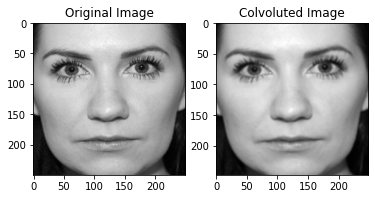

In [14]:
#testing avergae kernel
img = cv2.imread("face-2.jpg")
cleanImg = ICV_prepImage(img)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Original Image')
ax1.imshow(cleanImg, cmap='gray')
convolutedImage = ICV_Convolve(cleanImg, averageKernel)
ax2.set_title('Colvoluted Image')
ax2.imshow(convolutedImage, cmap='gray')

cv2.imwrite('averageKernel.jpg', convolutedImage)

##### C) Use the kernels provided below, apply the filtering function and save the resulting images.
##### Comment on the effect of each kernel.
##### kernel A
##### 1 2 1
##### 2 4 2
##### 1 2 1

##### kernel B
##### 0 1 0
##### 1 -4 1
##### 0 1 0

True

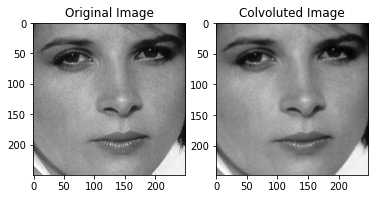

In [15]:
kernelA = np.array([1,2,1,2,4,2,1,2,1]).reshape(3,3)

img = cv2.imread("face-3.jpg")
cleanImg = ICV_prepImage(img)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Original Image')
ax1.imshow(cleanImg, cmap='gray')
convolutedImage = ICV_Convolve(cleanImg, kernelA)
ax2.set_title('Colvoluted Image')
ax2.imshow(convolutedImage, cmap='gray')

cv2.imwrite('kernelA.jpg', convolutedImage)

True

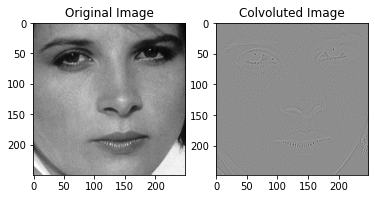

In [16]:
kernelB = np.array([0,1,0,1,-4,1,0,1,0]).reshape(3,3)

img = cv2.imread("face-3.jpg")
cleanImg = ICV_prepImage(img)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Original Image')
ax1.imshow(cleanImg, cmap='gray')
convolutedImage = ICV_Convolve(cleanImg, kernelB)
ax2.set_title('Colvoluted Image')
ax2.imshow(convolutedImage, cmap='gray')

cv2.imwrite('kernelB.jpg', convolutedImage)

##### D) Use the filtering function for the following filtering operations: 
##### (i) A followed by A; 
##### (ii) A followed by B;
##### (iii) B followed by A. Comment the results.

True

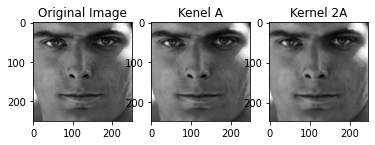

In [17]:
#reading img, cleaning img & plotting sublot canvas
img = cv2.imread("face-1.jpg")
cleanImg = ICV_prepImage(img)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

#i) kernelA > kernelA
convImgKernA = ICV_Convolve(cleanImg, kernelA)
convImgKernAA = ICV_Convolve(convImgKernA, kernelA)

ax1.set_title('Original Image')
ax1.imshow(cleanImg, cmap='gray')

ax2.set_title('Kenel A')
ax2.imshow(convImgKernA, cmap='gray')

ax3.set_title('Kernel 2A')
ax3.imshow(convImgKernAA, cmap='gray')

cv2.imwrite('kernelAA.jpg', convImgKernAA)

True

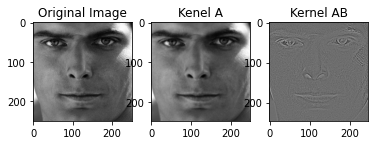

In [18]:
#reading img, cleaning img & plotting sublot canvas
img = cv2.imread("face-1.jpg")
cleanImg = ICV_prepImage(img)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

#i) kernelA > kernelB
convImgKernA = ICV_Convolve(cleanImg, kernelA)
convImgKernAB = ICV_Convolve(convImgKernA, kernelB)

ax1.set_title('Original Image')
ax1.imshow(cleanImg, cmap='gray')

ax2.set_title('Kenel A')
ax2.imshow(convImgKernA, cmap='gray')

ax3.set_title('Kernel AB')
ax3.imshow(convImgKernAB, cmap='gray')

cv2.imwrite('kernelAB.jpg', convImgKernAB)

True

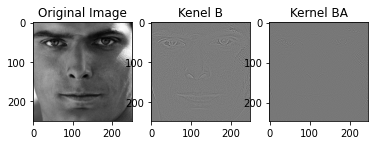

In [19]:
#reading img, cleaning img & plotting sublot canvas
img = cv2.imread("face-1.jpg")
cleanImg = ICV_prepImage(img)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

#i) kernelB > kernelA
convImgKernB = ICV_Convolve(cleanImg, kernelB)
convImgKernBA = ICV_Convolve(convImgKernB, kernelB)

ax1.set_title('Original Image')
ax1.imshow(cleanImg, cmap='gray')

ax2.set_title('Kenel B')
ax2.imshow(convImgKernB, cmap='gray')

ax3.set_title('Kernel BA')
ax3.imshow(convImgKernBA, cmap='gray')

cv2.imwrite('kernelBA.jpg', convImgKernBA)